<a href="https://colab.research.google.com/github/SheidaTalei/FinalProject/blob/main/SheidaTalei_Preprocessing_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUBJECT: Preprocessing 
## Author:  Sheida Talei

In [5]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install --target=$nb_path hazm

  Using cached https://files.pythonhosted.org/packages/22/13/5a7074bc11d20dbbb46239349ac3f85f7edc148b4cf68e9b8c2f8263830c/hazm-0.7.0-py3-none-any.whl
Processing /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c/nltk-3.3-cp36-none-any.whl
Processing /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab/libwapiti-0.2.1-cp36-cp36m-linux_x86_64.whl
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [1]:
!pip install --target=$nb_path persianutils

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
#Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import regex
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from hazm import *
import re
import string
import persianutils as pu
import persianutils.PersianAlphabet as pALpha




In [7]:
# !pip install hazm

In [6]:
# !pip install persianutils

In [7]:
#------------------------------------------Empty Rows Removal----------------------------------------------------------------
# This function Will: 1- Remove all empty rows from csv file 2- Save data to the same csv
def removeEmptyRows(fileName):
    df = pd.read_csv(fileName, encoding='utf-8-sig')
    df = df.dropna(subset=['text'], how='all', axis=0) 
    df.to_csv(fileName, header=True, encoding='utf-8-sig',  index=False)
    
    return df

In [8]:
#------------------------------------------------Normalization---------------------------------------------------------------
# This function will: 1- Normalize tweets (replace space with half-space)
def normalization (content):
    normalizer = Normalizer()
    tweets_normalize_list = []
    temp_set = []
    for item in range (len(content)):
        for word in content[item]:
            temp_word = normalizer.normalize(word)
            temp_set.append(temp_word.replace('\u200c', ' ', 1000000000))
                
                
        tweets_normalize_list.append(set(temp_set))
        temp_set = []
        
    return tweets_normalize_list

In [9]:
#---------------------------------------------------- Latin and Punctuation Removal-------------------------------------------
# This function will: 1- Remove latin words 2- Remove punctuations
# Source: https://stackoverflow.com/questions/18429143/strip-punctuation-with-regex-python/50985687
def latinRemoval(content):
    only_persian_tweet_list =[]
    temp_set = []

    latin = re.compile(r'[a-zA-Z0-9@$!%*?&-_`.+#(»)«,:;،؛…..؟]+')  

    for item in range(len(content)):
        for word in content[item]:
            temp_word = word.replace('\u200c', ' ', 1000000000)
               
            if not(latin.match(temp_word)) :
                if not temp_word.isdigit():
                        #source: https://pypi.org/project/persianutils/
                    word = re.findall(r'[^۰-۹]+', temp_word.strip(string.punctuation))
                    
                    if len(word) >0:    
                        processed_text = pu.standardize4Word2vec(word[0].strip())

                        if (processed_text != ' '):
#                             print(processed_text)
                            word = re.findall('\d+', processed_text.strip())
                            if len(word)==0 : 
                                temp_set.append(processed_text.strip())
                                print (processed_text.strip())
           
        only_persian_tweet_list.append(set(temp_set))
        temp_set = []
        
    return only_persian_tweet_list

In [10]:
#--------------------------------------------------Loading StopWords ------------------------------------------
#Source of file: https://sites.google.com/site/kevinbouge/stopwords-lists
def getStopWord ():
    try:
        file = open('/content/drive/MyDrive/Final/stopwords_fa.txt', 'r', encoding='utf-8-sig')
        file_readed = file.read()
    
    finally:
        file.close()
        
    stopWord_Set = set(file_readed.split())
    return stopWord_Set


In [11]:
#------------------------------------Tokenization and Stop Word Removal------------------------------------------------------
# This function will: 1- Tokenize words  2- Remove stop words and return a list of sets
def getTweetNoStopWord(content):
    tweet_no_StopWord_list =[]
    temp_set = []
    stop_word_list = getStopWord()
    for item in range(len(content)):
        for word in content[item]:
            if not word in stop_word_list:
                temp_set.append(word.replace('\u200c', ' ', 1000000000))
                
        tweet_no_StopWord_list.append(set (temp_set))
        temp_set = []
        
    return tweet_no_StopWord_list

In [12]:
#----------------------------------------------Lemmatization ------------------------------------------------------------------
def Lemmatization (content):
    lemmatizer = Lemmatizer()
    tweets_lemmatize_list = []
    temp_set = []
    for item in range(len(content)):
        for word in (content[item]):
            temp_set.append(lemmatizer.lemmatize(word.replace('\u200c', ' ', 1000000000)))
        tweets_lemmatize_list.append(set(temp_set))
        temp_set = []
    
    return tweets_lemmatize_list

In [13]:
#---------------------------------------------------Tokenization-------------------------------------------------------------
# Tokenizing X and at the end append Y as a label
def tokenization (X):
    tokenized_train_data = []
    for item in range(len(X)):
        var = word_tokenize(X[item])
#         var.append(Y[item])
        tokenized_train_data.append(var)
        
    return tokenized_train_data    

In [14]:
#Loading data

dfPrime_1 = pd.read_csv ('/content/drive/MyDrive/Final/Prime#1.csv', encoding='utf-8-sig')
dfPrime_2 = pd.read_csv ('/content/drive/MyDrive/Final/Prime#2.csv', encoding='utf-8-sig')
dfPrime_3 = pd.read_csv ('/content/drive/MyDrive/Final/Prime#3.csv', encoding='utf-8-sig')


df1 =  pd.read_csv ('/content/drive/MyDrive/Final/Main#1.csv', encoding='utf-8-sig')
df2 = pd.read_csv ('/content/drive/MyDrive/Final/Main#2.csv', encoding='utf-8-sig')
df3 = pd.read_csv ('/content/drive/MyDrive/Final/Main#3.csv', encoding='utf-8-sig')
df4 = pd.read_csv ('/content/drive/MyDrive/Final/Main#4.csv', encoding='utf-8-sig')
df5 = pd.read_csv ('/content/drive/MyDrive/Final/Main#5.csv', encoding='utf-8-sig')




data_frame= pd.concat([dfPrime_1, dfPrime_2,dfPrime_3,df1, df2, df3, df4, df5], ignore_index=True, names=['tweeter_handle', 'text', 'Label', 'statues_count' ])


In [18]:
#----------------------------------------------------------Step1----------------------------------------------------------
#----------------------------------Normalization_StopWord_Lemmatization_Punctuaation--------------------------------------
#Reading just coulmns of description and Label
# Remove repetetive tweets
def cleanData (df):
    df.drop_duplicates(subset=['text', 'tweeter_handle'], inplace=True)
    # train_data, test_data = train_test_split(df, test_size=0.2)
    # print('train data size: {}    test data size: {}'.format(len(train_data), len(test_data)))
    header = ['tweeter_handle', 'text', 'Label', 'statues_count']
    df.to_csv('/content/drive/MyDrive/Final/X_and_Y.csv', index=False, encoding='utf-8-sig' , columns = header )
    


    #Step 1: Removing empty rows from data set which contains only description and Label
    # This functon will remove empty rows and save them to same file (input file)
    removeEmptyRows('/content/drive/MyDrive/Final/X_and_Y.csv')
    
    #test
    # test_data.to_csv('/content/drive/MyDrive/Final/X_and_Y_test.csv', index=False, encoding='utf-8-sig')
    # #Step 1: Removing empty rows from data set which contains only description and Label
    # # This functon will remove empty rows and save them to same file (input file)
    # removeEmptyRows('/content/drive/MyDrive/Final/X_and_Y_test.csv')
    
    return df

#---------------------------------------------test-------------------------------------------------------------------------



In [19]:
cleanData (data_frame)


,id,alert_id,title,text,Label,url,published_at,source_type,language,country,favorite,tone,tweeter_handle,source_url,parent_url,parent_id,children,statues_count,cumulative_reach,domain_reach,tags,score,alert_name,description,followers_count,friends_count,listed_count,favourites_count,expanded_URL
0,1.338234e+11,1878333.0,"… لبها:\n\n""حضرت بهاالله و حضرت باب هردو ایران...","""حضرت بهاالله و حضرت باب هردو ایرانی بودند و۲۰...",0.0,https://twitter.com/itanmizrahi/status/1312647...,2020-10-04 06:54:36+00:00,twitter,fa,BJ,0.0,neutral,itanmizrahi,https://twitter.com/itanmizrahi,https://twitter.com/MadinejadMo/status/1312571...,1.338172e+11,0.0,1794.0,1794.0,NaN,NaN,22.0,بهائی + بهائیت + بهائیان+ فرقه بهائیت,NaN,NaN,NaN,NaN,NaN,NaN
1,1.338233e+11,1878333.0,بهائیان قاتل در ایران چه کردند؟ +عکس - مشرق نیوز,بهائیت یکی از مدعیان جانشینی سید کاظم رشتی، عل...,0.0,https://www.mashreghnews.ir/amp/183195/&ved=2a...,2020-10-04 06:53:44+00:00,news,fa,IR,0.0,neutral,mashreghnews.ir,https://mashreghnews.ir,NaN,NaN,0.0,NaN,NaN,992800.0,NaN,49.0,بهائی + بهائیت + بهائیان+ فرقه بهائیت,NaN,NaN,NaN,NaN,NaN,NaN
2,1.338234e+11,1878333.0,… شهادت_ميدهم در سال ۱۳۶۰چهار ماهه بودم که پدر...,RT @Payam49352414: #شهادت_ميدهم در سال ۱۳۶۰چها...,0.0,https://twitter.com/dOxXfGSdtD98jE3/status/131...,2020-10-04 06:42:34+00:00,twitter,fa,NaN,0.0,neutral,dOxXfGSdtD98jE3,https://twitter.com/dOxXfGSdtD98jE3,https://twitter.com/Payam49352414/status/13121...,1.337996e+11,0.0,4.0,4.0,NaN,NaN,9.0,بهائی + بهائیت + بهائیان+ فرقه بهائیت,NaN,NaN,NaN,NaN,NaN,NaN
3,1.338234e+11,1878333.0,@NarimanGharib @bbcpersian فرقه ضاله خمینی مثل...,@NarimanGharib @bbcpersian فرقه ضاله خمینی مثل...,1.0,https://twitter.com/navidtehraniii/status/1312...,2020-10-04 06:25:38+00:00,twitter,fa,NaN,0.0,neutral,navidtehraniii,https://twitter.com/navidtehraniii,NaN,NaN,0.0,1.0,1.0,NaN,NaN,7.0,بهائی + بهائیت + بهائیان+ فرقه بهائیت,NaN,NaN,NaN,NaN,NaN,NaN
4,1.338234e+11,1878333.0,@XrXIII من فرحزاد هستم دیش توییت خانم پاکروان ...,@XrXIII من فرحزاد هستم دیش توییت خانم پاکروان ...,0.0,https://twitter.com/Panke54788386/status/13126...,2020-10-04 06:07:32+00:00,twitter,fa,TJ,0.0,neutral,Panke54788386,https://twitter.com/Panke54788386,NaN,NaN,0.0,46.0,46.0,NaN,NaN,12.0,بهائی + بهائیت + بهائیان+ فرقه بهائیت,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134247,1.319322e+18,NaN,NaN,RT @tanasoli: با دوچرخه از روی اصلاحات رد شد!,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mohiman1360,NaN,NaN,NaN,NaN,9422.0,NaN,NaN,NaN,NaN,NaN,‏‏‏👑🦁🌞\n‏خسته از بودن .\nبودن یا نبودن؟,1457.0,1503.0,0.0,17155.0,NaN
134248,1.319322e+18,NaN,NaN,آخرهفته هم باگاف ضدانقلاب تمام شد. دعوای شخصی ...,0.0,https://t.co/QEj7M6oyjr,NaN,NaN,NaN,NaN,NaN,NaN,zhrwlii17,NaN,NaN,NaN,NaN,11944.0,NaN,NaN,NaN,NaN,NaN,‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏🏞‏‏‏‏‏‏‏‏‏‏‏...,5614.0,5072.0,1.0,26522.0,https://twitter.com/i/web/status/1319317306732...
134249,1.319322e+18,NaN,NaN,#مهدی_کاظمی مامور حراست پالایشگاه و #احمد_جهان...,1.0,https://t.co/OwLyM31G08,NaN,NaN,NaN,NaN,NaN,NaN,dilani64,NaN,NaN,NaN,NaN,3474.0,NaN,NaN,NaN,NaN,NaN,NaN,498.0,483.0,0.0,10264.0,https://twitter.com/i/web/status/1319296469522...
134250,1.319322e+18,NaN,NaN,RT @tiredzra: ما همه صدای #دختر_آبادانی هستیم:...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smiley_niyaz,NaN,NaN,NaN,NaN,7314.0,NaN,NaN,NaN,NaN,NaN,‏‏‏‏‏Larrie / Ziam child\n~INFP ~ 🏳️‍🌈 TPWK ~ ...,512.0,392.0,1.0,20687.0,NaN


In [22]:
#------------------------------------------------------Step 2------------------------------------------------------------------
#step 2: Tokenizing data
X_and_Y = pd.read_csv('/content/drive/MyDrive/Final/X_and_Y.csv',encoding="utf-8")



X = X_and_Y.text
Y= X_and_Y.Label


#Tokenization
tokenize_list = tokenization (X)
#------------------------------------------------------test---------------------------------------------------------------------
#step 2: Tokenizing data
# X_and_Y_test = pd.read_csv('/content/drive/MyDrive/Final/X_and_Y_test.csv',encoding="utf-8")



# X_test = X_and_Y_test.text
# Y_test= X_and_Y_test.Label

# # #Tokenization
# train_data_tokenize_list_test = tokenization (X_test)

In [23]:
print(tokenize_list[3755])

['@MadinejadMo', 'ته', 'شما', '#بهائیان', 'به', 'چند', 'سال', 'قبل', 'تر', 'بر', 'می', 'گرده', '!!!', 'اولا', 'میگن', 'سر', 'زمین', 'مادری', '!!!', 'دوما', 'وطن', 'برای', 'ما', 'فراتر', 'از', 'تصور', 'شما', 'تعریف', 'میشه', 'تا', 'حدی', 'که', 'جونمون', 'هم', 'در', 'راهش', 'میدیم', 'چه', 'برسه', 'بقیه', 'ی', 'چیزها', '!!!', 'سوما', 'وطن', 'شما', 'که', 'عزیز', 'کانادا', 'قید', 'شده', '!!!!']


In [24]:
#------------------------------------------------------Step 3------------------------------------------------------------------
#step 3: removing HASHTAGS, MENTIONS, NUMBERS and any LATIN WORD
# This function get tokenized list of data and remove mentioned elements

only_persian_tweet_list = latinRemoval(tokenize_list)
#------------------------------------------------------test--------------------------------------------------------------------
#step 3: removing HASHTAGS, MENTIONS, NUMBERS and any LATIN WORD
# This function get tokenized list of data and remove mentioned elements

# only_persian_tweet_list_test = latinRemoval(train_data_tokenize_list_test)

Streaming output truncated to the last 5000 lines.
خوب
و
خواب
تو
کتابم
یه
روز
اگه
مو
به
تنت
سیخ
نشه
از
اتفاقات
این
خاک
عجیبه
کیر
توی
این
مملکت
کیررررررررررررررر
میشه
اینو
نشر
بدین
بچه
ها
مادرم
اربعین
فرزندت
تسلیت
باد
اهای
ارزشی
و
اصلاح
طلبی
که
برای
جورج
فلوید
امریکایی
هشتگ
زدی
سینه
دریدی
و
شمع
روشن
کردی
این
خانم
غرق
در
خون
هموطن
تو
و
ناموس
ایران
است
که
توسط
مدیر
پالایشگاه
ابادان
مورد
تجاوز
قرار
گرفت
و
کارمندان
حراست
مدیر
هم
او
را
مورد
ضرب
و
شتم
و
تجاوز
قرار
دادند
ابان
تا
ابد
برای
من
یاد
اور
درد
و
اندوهه
ایران
کشوری
بود
که
سال
قبل
زنا
توش
ارزش
داشتن
حکومت
می
کردن
و
باارزش
بودن
سال
قبل
حتی
نمی
تونین
تصور
کنید
این
کشور
چقدر
شگفت
انگیز
بود
و
الان
الان
باز
میان
میگن
یه
سری
ربات
دارن
توییت
میزنن
هر
کاری
هم
انجام
بدین
نمیتونین
ما
رو
ساکت
کنین
ایا
این
فرد
شایستگی
نمایندگی
مردم
امریکا
و
دموکراسی
امریکا
را
دارد
شما
جواب
بده
اس…
تکرار
ابان
و
خون
فک
نمی کردی
کسی
ببینه
داری
به
اون
دختر
مظلوم
تعرض
می کنی
نه
سخنگوی
مجاهدین
درمورد
پرت
و
پلای
سوزناک
وزارتخارجه
ولایت
فقیه
پیدا
کنید
رابطه
بین
مجرد
بودن
و

In [26]:
print(tokenize_list[3755])
print ('  ')
print(only_persian_tweet_list[3755])

['@MadinejadMo', 'ته', 'شما', '#بهائیان', 'به', 'چند', 'سال', 'قبل', 'تر', 'بر', 'می', 'گرده', '!!!', 'اولا', 'میگن', 'سر', 'زمین', 'مادری', '!!!', 'دوما', 'وطن', 'برای', 'ما', 'فراتر', 'از', 'تصور', 'شما', 'تعریف', 'میشه', 'تا', 'حدی', 'که', 'جونمون', 'هم', 'در', 'راهش', 'میدیم', 'چه', 'برسه', 'بقیه', 'ی', 'چیزها', '!!!', 'سوما', 'وطن', 'شما', 'که', 'عزیز', 'کانادا', 'قید', 'شده', '!!!!']
  
{'سوما', 'شما', 'قید', 'سر', 'زمین', 'بقیه', 'تصور', 'تر', 'برسه', 'چیزها', 'جونمون', 'قبل', 'کانادا', 'سال', 'هم', 'میگن', 'تا', 'که', 'ی', 'اولا', 'وطن', 'فراتر', 'چند', 'گرده', 'مادری', 'راهش', 'میدیم', 'ما', 'تعریف', 'ته', 'شده', 'عزیز', 'دوما', 'میشه', 'حدی', 'در', 'بر', 'چه', 'از', 'برای', 'به', 'می'}


In [27]:
#------------------------------------------------------Step 4------------------------------------------------------------------
#step 4: Normalization
normalize_tweet_list = normalization (only_persian_tweet_list)

#-------------------------------------------------------test-------------------------------------------------------------------
#step 4: Normalization
# normalize_tweet_list_test = normalization (only_persian_tweet_list_test)


In [28]:
print(normalize_tweet_list[3755])

{'سوما', 'شما', 'قید', 'سر', 'زمین', 'بقیه', 'تصور', 'تر', 'برسه', 'چیزها', 'جونمون', 'قبل', 'کانادا', 'سال', 'هم', 'میگن', 'تا', 'که', 'ی', 'اولا', 'وطن', 'فراتر', 'چند', 'گرده', 'مادری', 'راهش', 'میدیم', 'ما', 'تعریف', 'ته', 'شده', 'عزیز', 'دوما', 'میشه', 'حدی', 'در', 'بر', 'چه', 'از', 'برای', 'به', 'می'}


In [29]:
#------------------------------------------------------Step 5------------------------------------------------------------------
#step 5: Remove stop words
noStopWord_tweet_List = getTweetNoStopWord(normalize_tweet_list)

#-------------------------------------------------------test-------------------------------------------------------------------
#step 5: Remove stop words
# noStopWord_tweet_List_test = getTweetNoStopWord(normalize_tweet_list_test)


In [30]:
print(noStopWord_tweet_List[3755])

{'سوما', 'قید', 'سر', 'زمین', 'بقیه', 'تصور', 'برسه', 'چیزها', 'جونمون', 'کانادا', 'سال', 'میگن', 'ی', 'اولا', 'وطن', 'فراتر', 'گرده', 'مادری', 'راهش', 'میدیم', 'تعریف', 'ته', 'عزیز', 'دوما', 'حدی'}


In [31]:
#------------------------------------------------------Step 6------------------------------------------------------------------
#step 6: Lemmatixation
lemmatize_tweet_list = Lemmatization (noStopWord_tweet_List)
#-------------------------------------------------------test-------------------------------------------------------------------
#step 6: Lemmatixation
# lemmatize_tweet_list_test = Lemmatization (noStopWord_tweet_List_test)


In [32]:
print(lemmatize_tweet_list[6699])

{'جای', 'شک', 'تماس', 'فتوا', 'نجاست', 'جریان', 'تحریم', 'بهائیان', 'بجا', 'دشوار', 'خطرناک ترین', 'حد', 'می شمارد', 'دشمن', 'حکومت', 'زیرا', 'چنین', 'سایه ی', 'اسلام', 'رفتار', 'دشمنانه ی', 'سو', 'انان', 'یافتن', 'هرگونه', 'حکومت گران', 'نمی گذارد', 'رژیم', 'بهائی'}


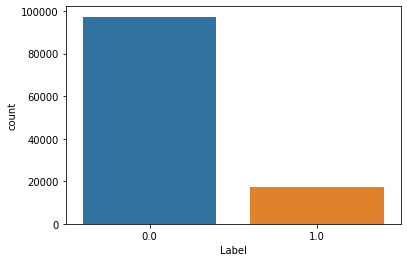

In [33]:
#Source : https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras/
#shows the proportion of the whole data both train and test
import seaborn as sns

sns.countplot(x='Label', data=cleanData (data_frame))

In [34]:
def convertSequenceWordsToText(input_list,  fileName, lastFileName):
    X_and_Y = pd.read_csv(fileName , encoding="utf-8")
    text = ''
    counter = 0
    for item in input_list:
        for i in range(len(item)):
            text += list(item)[i] + ' '
        print(counter)    
        X_and_Y.loc [counter, 'text'] = text.strip()
        X_and_Y.to_csv(lastFileName ,index=False, encoding='utf-8-sig')
        counter = counter + 1
        text =''

In [ ]:

convertSequenceWordsToText(lemmatize_tweet_list, '/content/drive/MyDrive/Final/X_and_Y.csv', '/content/drive/MyDrive/Final/Prepared_Data.csv')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
# convertSequenceWordsToText(lemmatize_tweet_list_test, '/content/drive/MyDrive/Final/X_and_Y_test.csv', '/content/drive/MyDrive/Final/Prepared_test_Data.csv' )

Streaming output truncated to the last 5000 lines.
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760

In [ ]:
#divide data to train and test
dataFrame =  pd.read_csv ('/content/drive/MyDrive/Final/Prepared_Data.csv', encoding='utf-8-sig')
train_data, test_data = train_test_split(dataFrame, test_size=0.3)
train_data.to_csv('/content/drive/MyDrive/Final/Prepared_train_Data.csv' ,index=False, encoding='utf-8-sig')
test_data.to_csv('/content/drive/MyDrive/Final/Prepared_test_Data.csv' ,index=False, encoding='utf-8-sig')